In [29]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r'C:\Users\akhil\Desktop\python projects\diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


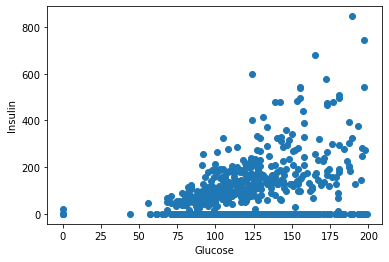

In [6]:
plt.scatter(data['Glucose'], data['Insulin'])
plt.xlabel('Glucose')
plt.ylabel('Insulin')
plt.show()

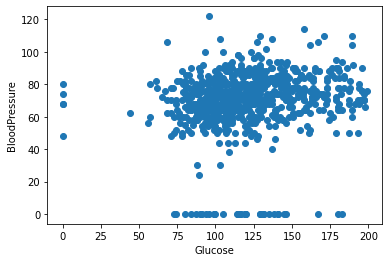

In [7]:
plt.scatter(data['Glucose'], data['BloodPressure'])
plt.xlabel('Glucose')
plt.ylabel('BloodPressure')
plt.show()

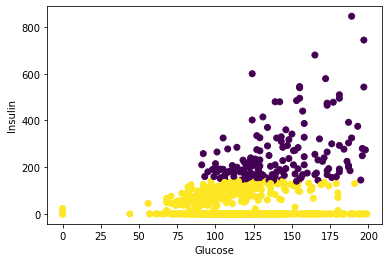

In [8]:

# data1 create
data1 = data.loc[:, ['Glucose', 'Insulin']]
# KMEANS 1
from sklearn.cluster import KMeans
kmeans1 = KMeans(n_clusters=2)
kmeans1.fit(data1)
labels1 = kmeans1.predict(data1)

# visualization
plt.scatter(data['Glucose'], data['Insulin'], c = labels1)
plt.xlabel('Glucose')
plt.ylabel('Insulin')
plt.show()

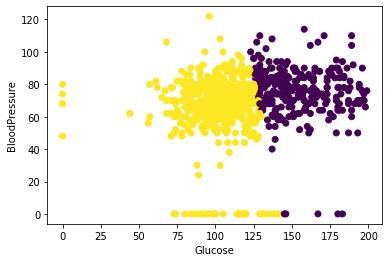

In [9]:
# data2 create
data2 = data.loc[:, ['Glucose', 'BloodPressure']]
# KMEANS 2
kmeans2 = KMeans(n_clusters=2)
kmeans2.fit(data2)
labels2 = kmeans2.predict(data2)

# visualization
plt.scatter(data['Glucose'], data['BloodPressure'], c = labels2)
plt.xlabel('Glucose')
plt.ylabel('BloodPressure')
plt.show()

In [22]:
df = pd.DataFrame({'labels':labels1, 'Outcome':data['Outcome']})
crosstab1 = pd.crosstab(df['labels'],df['Outcome'])
crosstab1

Outcome,0,1
labels,,
0,79,86
1,421,182


In [23]:
df = pd.DataFrame({'labels':labels2, 'Outcome':data['Outcome']})
crosstab2 = pd.crosstab(df['labels'],df['Outcome'])
crosstab2

Outcome,0,1
labels,,
0,113,165
1,387,103


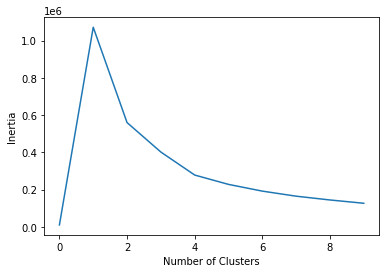

In [17]:
iner_list = np.empty(10)
for i in range(1,10):
    kmeans2 = KMeans(n_clusters=i)
    kmeans2.fit(data2)
    iner_list[i] = kmeans2.inertia_

# iner_list = iner_list%100
# show the best number in graph
plt.plot(range(0,10), iner_list,'-')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

In [18]:
data3 = data.drop('Outcome', axis = 1)
data3

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

sscaler = StandardScaler()
kmeans2 = KMeans(n_clusters=4)
pipeline = make_pipeline(sscaler, kmeans2)
pipeline.fit(data3)

# cross table
labels = pipeline.predict(data3)
df = pd.DataFrame({'labels':labels, 'Outcome':data['Outcome']})
crosstab = pd.crosstab(df['labels'], df['Outcome'])
crosstab

Outcome,0,1
labels,,
0,300,44
1,110,102
2,70,106
3,20,16


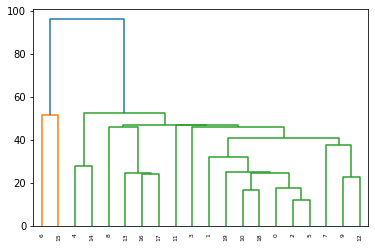

In [33]:
from scipy.cluster.hierarchy import linkage, dendrogram

merge = linkage(data3.iloc[200:220,:],method = 'single')
dendrogram(merge, leaf_rotation = 90, leaf_font_size = 6)
plt.show()

In [25]:

##Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=2, affinity="euclidean",linkage="ward")
cluster = hc.fit_predict(data3)
data3['Label'] = cluster
data3

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,1
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,1
4,0,137,40,35,168,43.1,2.288,33,0
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,1
765,5,121,72,23,112,26.2,0.245,30,1
766,1,126,60,0,0,30.1,0.349,47,1


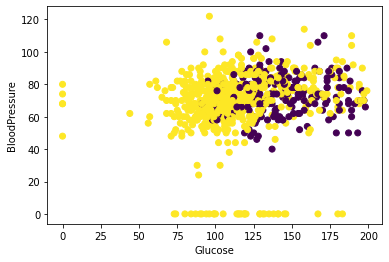

In [26]:
plt.scatter(data3['Glucose'], data3['BloodPressure'], c = cluster)
plt.xlabel('Glucose')
plt.ylabel('BloodPressure')
plt.show()

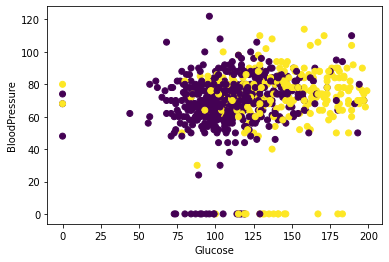

In [27]:
plt.scatter(data['Glucose'], data['BloodPressure'], c = data['Outcome'])
plt.xlabel('Glucose')
plt.ylabel('BloodPressure')
plt.show()

In [28]:
data3['Outcome'] = data['Outcome']
data3

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Label,Outcome
0,6,148,72,35,0,33.6,0.627,50,1,1
1,1,85,66,29,0,26.6,0.351,31,1,0
2,8,183,64,0,0,23.3,0.672,32,1,1
3,1,89,66,23,94,28.1,0.167,21,1,0
4,0,137,40,35,168,43.1,2.288,33,0,1
...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,0
764,2,122,70,27,0,36.8,0.340,27,1,0
765,5,121,72,23,112,26.2,0.245,30,1,0
766,1,126,60,0,0,30.1,0.349,47,1,1


In [31]:
correct = []
for i in range(0,767):
    if data3['Label'][i] == data3['Outcome'][i]:
        correct.append(1)
    else:
        correct.append(0)
correct[0:10] # -> if we find correctly 1, if not 0

[1, 0, 1, 0, 0, 0, 1, 0, 0, 1]

In [32]:
print("Hierarchical Clustering Accuracy : ", (correct.count(1)/data3['Label'].size)*100)

Hierarchical Clustering Accuracy :  32.421875
